<a href="https://colab.research.google.com/github/omicsEye/PUBH6859/blob/main/Assignment5_QingChen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading of data


1.   If the data is in Google Drive, just specify the path in the ***google.colab import***
2.   If the data is in local drive, skip the first ***google.colab import*** specify the path of the file in the ***pd.read_csv function***



In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# first row as the header, first column as index
metabolite = pd.read_csv("/content/drive/My Drive/omicsEye/PUBH6859/metabolites.txt", sep="\t",header = 0, index_col= 0 )

metabolite.head(2)


,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,histamine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
31593,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.925450,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.954280,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.338380,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,0.859438,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.173720,0.255931,1.564567,2.776705,0.885554,0.024495,1.849770,47.868225,6.558881,0.492449,0.472759,4.286731,0.723380,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
31595,0.778072,0.854428,1.052241,1.809722,1.124312,1.035850,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.333840,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.911910,1.083882,0.248725,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.189820,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914


In [ ]:
# first row as the header, first column as index
info = pd.read_csv("/content/drive/My Drive/omicsEye/PUBH6859/sample_info.txt", sep="\t", header=0,index_col= 0)
info.head(2)

,Group,Time,Aorta_Portal,Position,Position2,Animal
31592,1_RYGB,Week 1,A,C,P3,RYGB 7
31593,1_RYGB,Week 1,P,C,P4,RYGB 7


# Data cleaning & Data preparation (slightly changes)

1.   The data is transposed to fit the desired format
2.   the NaN(Not a Number) values are taken care here by droping them, from the data itself.

1.   The datasets are merged to form the complete dataset that is required for the study.

1.   Missing row names are added and some missing values which are not NaN are also taken care of

















In [ ]:
# Drop NA
metabolite = metabolite.dropna(axis =1)
metabolite.head(2)

,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,histamine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
31593,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.925450,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.954280,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.338380,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,0.859438,...,1.606153,1.339748,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.173720,0.255931,1.564567,2.776705,0.885554,0.024495,1.849770,47.868225,6.558881,0.492449,0.472759,4.286731,0.723380,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914
31595,0.778072,0.854428,1.052241,1.809722,1.124312,1.035850,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.333840,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.911910,1.083882,0.248725,...,1.352735,0.593864,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.189820,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914


In [ ]:
# remove some column from info dataframe
info  = info.loc[:,["Group","Time"]] #
info.head()

,Group,Time
31592,1_RYGB,Week 1
31593,1_RYGB,Week 1
31594,1_RYGB,Week 1
31595,1_RYGB,Week 1
31596,1_RYGB,Week 1


In [ ]:
info.columns

Index(['Group', 'Time'], dtype='object')

In [ ]:
# combine the data: different methods to produce the same results

# 1. merge on index 
df1 = pd.merge(metabolite,info, left_index= True, right_index= True)

# 2. join. # default left join
df2 = metabolite.join(info)

# 3. concat. #. by default join = "outer"
df3 = pd.concat([metabolite,info],axis =  1, join = "inner")

print(df1.shape,df2.shape,df3.shape). # same results 

print(df1.head())
print(df2.head())
print(df3.head())


(30, 594) (30, 594) (30, 594)
        glycine  N-acetylglycine  sarcosine  ...  6-acetylglucose   Group    Time
31593  0.764476         0.980503   0.763311  ...         0.702914  1_RYGB  Week 1
31595  0.778072         0.854428   1.052241  ...         0.702914  1_RYGB  Week 1
31597  0.994348         0.678962   1.685811  ...         3.794518  1_RYGB  Week 1
31599  0.853183         1.018974   0.846395  ...         4.169416  1_RYGB  Week 1
31601  0.830975         1.067030   1.245168  ...         4.000286  1_RYGB  Week 1

[5 rows x 594 columns]
        glycine  N-acetylglycine  sarcosine  ...  6-acetylglucose   Group    Time
31593  0.764476         0.980503   0.763311  ...         0.702914  1_RYGB  Week 1
31595  0.778072         0.854428   1.052241  ...         0.702914  1_RYGB  Week 1
31597  0.994348         0.678962   1.685811  ...         3.794518  1_RYGB  Week 1
31599  0.853183         1.018974   0.846395  ...         4.169416  1_RYGB  Week 1
31601  0.830975         1.067030   1.245168 

In [ ]:
# extract a sample
df1.loc[31593,]

glycine                    0.764476
N-acetylglycine            0.980503
sarcosine                  0.763311
dimethylglycine             3.80446
betaine                     1.11318
                             ...   
6-hydroxyindole sulfate     7.98359
thioproline                 1.14949
6-acetylglucose            0.702914
Group                        1_RYGB
Time                         Week 1
Name: 31593, Length: 594, dtype: object

In [ ]:
# merge the data
# df_join = pd.merge(info, metabolite, on=['Sample_ID'])
df = pd.merge(metabolite,info, left_index= True, right_index= True)

# # turn the index to a column "Sample_ID"
# df.reset_index(inplace=True)
# # rename the column name index --> Sample_ID
# df = df.rename(columns =  {"index":"Sample_ID"})
df.head(2)

,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,histamine,...,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose,Group,Time
31593,0.764476,0.980503,0.763311,3.804459,1.113178,0.944598,3.934462,0.761158,1.856078,0.800685,2.140186,1.644787,0.925450,0.788742,1.692826,2.880387,1.621283,1.286609,8.338279,0.897692,1.954280,1.199227,0.175787,21.463964,2.361909,0.521842,1.098816,11.086291,4.953143,1.804828,1.271886,2.493006,1.338380,1.040741,30.724224,2.016838,1.041511,3.165958,1.468915,0.859438,...,1.106379,2.751503,1.329715,0.442419,1.165705,0.213593,1.470411,1.243077,0.196333,1.968585,5.173720,0.255931,1.564567,2.776705,0.885554,0.024495,1.849770,47.868225,6.558881,0.492449,0.472759,4.286731,0.723380,1,0.027885,7.434881,0.075804,3.543272,0.906794,0.609301,0.363288,0.784635,2.342844,4.766011,5.954872,7.983591,1.149486,0.702914,1_RYGB,Week 1
31595,0.778072,0.854428,1.052241,1.809722,1.124312,1.035850,1.803863,0.647857,0.578488,0.598287,1.004495,1.380264,0.339317,0.782238,0.546892,1.251637,1.144113,1.274944,4.340356,0.267408,0.868177,1.333840,0.236609,6.701089,0.738143,0.149757,1.102993,3.376704,1.881494,0.562245,0.235787,0.941887,0.597944,0.028509,5.260031,0.938103,1.195869,0.911910,1.083882,0.248725,...,0.695348,0.667523,1.006609,0.442419,0.822608,0.213593,1.073603,1.130102,0.266236,1.073001,1.962254,1.335502,0.664477,0.652602,0.836172,0.024495,0.898312,9.891383,2.189820,0.492449,0.472759,0.607359,1.354777,1,0.027885,2.078918,0.075804,1.133949,0.337813,0.587401,0.363288,0.991901,1.775936,1.225544,0.265157,0.588935,0.720695,0.702914,1_RYGB,Week 1


# Basic exploration of the data

In [ ]:
# some basic statistic of the data ------  how many groups / time points
from collections import  Counter
print(Counter(list(df.Group)))
print(Counter(list(df.Time)))

# use df.describe()
# df["Group"].describe()
df.Group.describe()

# string columns
df.describe(include=[object])


Counter({'1_RYGB': 10, '2_Sham': 10, '4_Weight Matched': 10})
Counter({'Week 1': 15, 'Month 3': 15})


,Group,Time
count,30,30
unique,3,2
top,1_RYGB,Week 1
freq,10,15


In [ ]:
# numeric columns
df.describe(include=[np.number])

,glycine,N-acetylglycine,sarcosine,dimethylglycine,betaine,serine,N-acetylserine,threonine,N-acetylthreonine,alanine,N-acetylalanine,aspartate,N-acetylaspartate (NAA),asparagine,N-acetylasparagine,hydroxyasparagine,glutamate,glutamine,alpha-ketoglutaramate*,N-acetylglutamate,N-acetylglutamine,4-hydroxyglutamate,pyroglutamine*,N-acetyl-aspartyl-glutamate (NAAG),carboxyethyl-GABA,S-1-pyrroline-5-carboxylate,histidine,1-methylhistidine,3-methylhistidine,N-acetylhistidine,N-acetyl-3-methylhistidine*,N-acetyl-1-methylhistidine*,trans-urocanate,imidazole propionate,formiminoglutamate,imidazole lactate,carnosine,N-acetylcarnosine,anserine,histamine,...,pantothenate (Vitamin B5),threonate,oxalate (ethanedioate),gulonate*,alpha-tocopherol,alpha-CEHC sulfate,gamma-tocopherol/beta-tocopherol,heme,bilirubin,"bilirubin (E,E)*",biliverdin,retinol (Vitamin A),pyridoxamine,pyridoxal,pyridoxate,hippurate,benzoate,4-ethylphenyl sulfate,p-cresol sulfate,2-piperidinone,"2,3-dihydroxyisovalerate",2-oxindole-3-acetate,3-formylindole,gluconate,beta-guanidinopropanoate,equol glucuronide,ergothioneine,erythritol,homostachydrine*,mannonate*,stachydrine,tartronate (hydroxymalonate),"2,6-dihydroxybenzoic acid",maleoylcarnitine,sulfate*,O-sulfo-L-tyrosine,2-oxo-1-pyrrolidinepropionate,6-hydroxyindole sulfate,thioproline,6-acetylglucose
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1.057275,1.073585,0.988041,1.341889,0.996806,1.035911,1.514784,1.026711,1.173415,1.003860,1.264362,1.143275,1.299471,0.971254,1.072800,1.132172,1.213641,1.020226,2.067680,1.550192,1.044138,1.211622,1.303660,4.452663,1.183385,1.145274,1.017219,2.388260,1.430871,1.080389,1.036943,1.208342,1.367448,1.477690,5.823902,0.986051,1.092588,1.220206,1.022836,1.247795,...,1.031198,1.004782,1.026056,1.397955,1.035363,0.975675,1.243585,1.433689,0.643300,0.601722,1.143500,1.065239,1.350167,0.891694,1.482511,4.782245,1.335313,0.089529,4.260928,11.032608,2.265130,0.880505,1.140138,1.368122,1.044844,1.0,0.092693,1.704486,0.497186,1.285072,8.888190,1.051461,0.823434,1.008169,1.240041,1.441114,1.927045,4.386340,1.232458,1.340169
std,0.253118,0.375993,0.421231,0.867697,0.135856,0.198945,1.248292,0.354041,0.616039,0.258844,0.941462,0.794144,0.851622,0.189825,0.509257,0.689234,0.728676,0.241877,2.449720,2.698637,0.372177,0.896793,1.017705,8.046135,0.862287,0.991268,0.164976,2.883732,1.170641,0.643772,0.613584,0.703884,0.934668,1.330747,10.361897,0.538125,0.605983,1.400195,0.516249,1.058353,...,0.387291,0.350429,0.288363,1.084276,0.710496,1.044939,0.984465,3.631683,0.600291,0.485271,1.194849,0.627436,1.527190,0.352094,1.324207,15.061886,0.853066,0.356204,17.348199,29.654288,3.088181,0.492748,0.797690,1.089234,0.658576,0.0,0.354966,1.846781,2.140103,1.134975,39.857860,0.344098,1.495244,0.285664,0.501063,1.293203,2.460554,16.532586,0.750292,1.012379
min,0.607936,0.301852,0.422501,0.579968,0.717534,0.692393,0.442021,0.478687,0.463134,0.598287,0.524793,0.325999,0.339317,0.556639,0.546892,0.306780,0.507089,0.594004,0.486715,0.267408,0.332038,0.277941,0.056365,0.232034,0.341404,0.149757,0.688007,0.570706,0.484762,0.250464,0.217087,0.354075,0.373562,0.028509,0.212168,0.252708,0.383820,0.521881,0.314679,0.248725,...,0.172956,0.511754,0.576020,0.297722,0.009874

In [ ]:
df.groupby("Group").glycine.mean()

Group
1_RYGB              0.973168
2_Sham              0.958900
4_Weight Matched    1.239756
Name: glycine, dtype: float64

In [ ]:
# Groups = list(Counter(list(df.Group)).keys())
Groups = list(df.Group.unique())
Groups
# df["glycine",]

['1_RYGB', '2_Sham', '4_Weight Matched']

In [ ]:
# df[df.Group =="1_RYGB"].glycine

# Kruskal-Wallis test and visualization

In [ ]:
# import packages

from scipy import stats

import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt
# display plot in this note book
%matplotlib inline


In [ ]:
# debug: "equol glucuronide". All values are 1, can not perform Kruskal-Wallis test

# "equol glucuronide". All values are 1, std ==0, can not perform Kruskal-Wallis test
# remove the column
# df = df.drop()
test = df.groupby("Group").std() 
remove = test.loc[:,test.sum() == 0]
remove.columns.to_list()

df = df.drop(remove.columns.to_list(),axis  = 1)
# df

**test on one metabolite**

In [ ]:
##  Kruskal-Wallis test on one metabolite

stats.kruskal(df[df.Group == Groups[0]].glycine, df[df.Group ==Groups[1]].glycine,df[df.Group ==Groups[2]].glycine)

KruskalResult(statistic=8.740645161290317, pvalue=0.012647160180823173)

**plot on one metabolite**




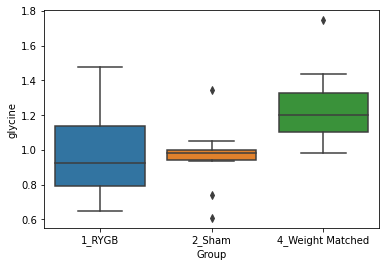

In [ ]:
# plot of one metabolite
metabolite = "glycine"
test_df = df.loc[:,[metabolite,"Group"]]
test_df.head()
sns.boxplot(x = "Group",y = "glycine", data = test_df )

**Find the metabolites that are different among different groups and do some visualization**

In [ ]:
# Kruskal-Wallis test to see if the metabolite is different among different groups.

diff_metabolite = []

for metabolite in df.columns[:-2]:
  # metabolite = "glycine"
  # print(metabolite)

  # for each metabolite do the Kruskal-Wallis test
  test_df = df.loc[:,[metabolite,"Group"]]
  stat,p = stats.kruskal(test_df[test_df.Group ==Groups[0]][metabolite],test_df[test_df.Group ==Groups[1]][metabolite],test_df[test_df.Group ==Groups[2]][metabolite])
  # print(p)
  if p < 0.05:
    diff_metabolite.append((metabolite,p))

In [ ]:
# number of metabolites that are different among different groups
len(diff_metabolite) # 207

# sort them according to the p_value
diff_metabolite_df = pd.DataFrame(diff_metabolite, columns = ["metabolites","p_value"])
diff_metabolite_df_sorted = diff_metabolite_df.sort_values("p_value")
diff_metabolite_df_sorted.head()

,metabolites,p_value
162,sphinganine,0.000136
161,linoleoyl-docosahexaenoyl-glycerol (18:2/22:6)...,0.000264
150,palmitoyl-docosahexaenoyl-glycerol (16:0/22:6)...,0.000306
175,"sphingomyelin (d18:1/25:0, d19:0/24:1, d20:1/2...",0.000313
170,"ceramide (d18:2/24:1, d18:1/24:2)*",0.000339


In [ ]:
# plot the p_value
# sns.barplot(x ="metabolites",y = "p_value", data=diff_metabolite_df_sorted)

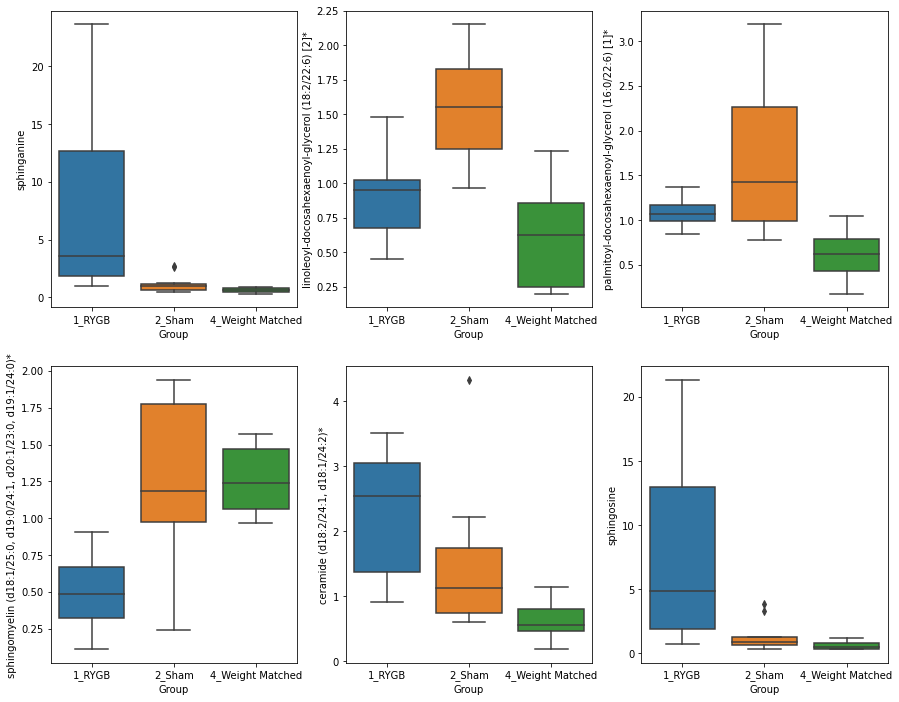

In [ ]:
# -------- plot the first 6 metabolites that are most different among different groups------------
DiffMetabolites = list(diff_metabolite_df_sorted.metabolites)
plt.figure(figsize=(15,12))
for i in range(6):
  # print(DiffMetabolites[i])
  # plt.figure()
  plt.subplot(2,3,i+1)
  test_df = df.loc[:,[DiffMetabolites[i],"Group"]]
  sns.boxplot(x = "Group",y = DiffMetabolites[i], data = test_df )

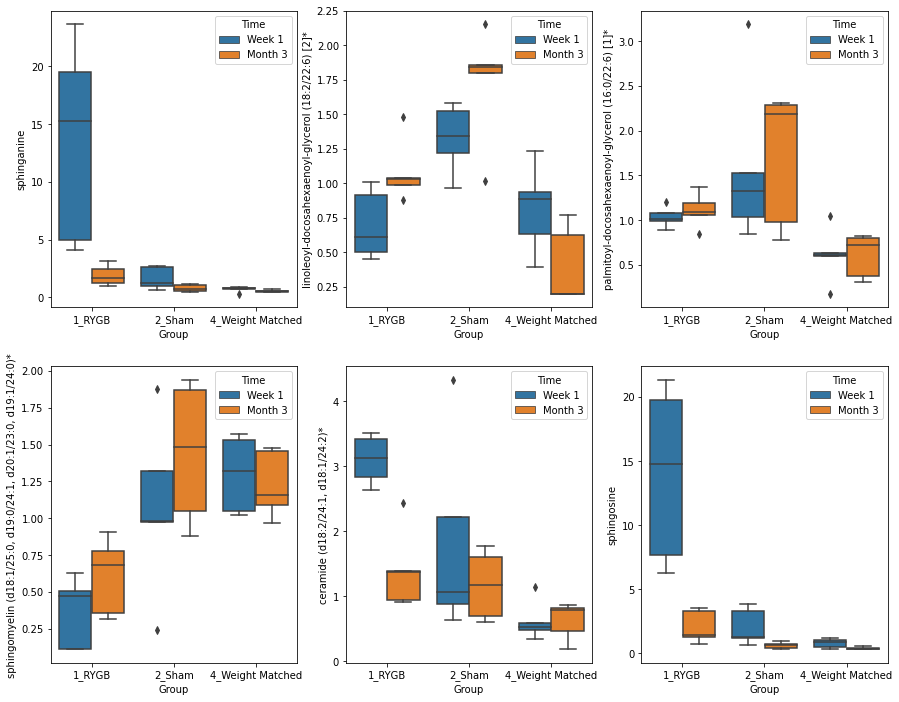

In [ ]:
# -------- plot the first 6 metabolites that are most different among different groups------------
# ----------- add the Time ------just for curiosity--------
DiffMetabolites = list(diff_metabolite_df_sorted.metabolites)
plt.figure(figsize=(15,12))
for i in range(6):
  # print(DiffMetabolites[i])
  # plt.figure()
  plt.subplot(2,3,i+1)
  test_df = df.loc[:,[DiffMetabolites[i],"Group","Time"]]
  sns.boxplot(x = "Group",y = DiffMetabolites[i],hue="Time", data = test_df )

# conclusion
Among all the 592 metabolites, there are 207 metabolites that are different among groups.

If the predictor is given, then these 207 metabolites  can be further use for predication by using either linear regression(like logistic regression ) or classification method like random forest.